# 📊 Proyecto Guiado - Análisis de Ventas de Videojuegos
## Parte 5: Visualizaciones Avanzadas e Interactivas

---

### 🎯 Objetivos de este notebook:
1. Crear gráficos interactivos con Plotly
2. Desarrollar visualizaciones avanzadas
3. Construir dashboards visuales
4. Preparar visualizaciones para la app web
5. Aplicar storytelling con datos

---

### 📚 ¿Por qué Plotly?

**Plotly** permite crear gráficos interactivos:
- Zoom, pan, hover tooltips
- Exportables a HTML
- Perfectos para dashboards web
- Aspecto profesional y moderno

## 1. Importar librerías

In [2]:
%pip install matplotlib seaborn pandas numpy plotly streamlit 

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar librerías
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py

# Configuraciones


# Cargar dataset limpio
df_clean = pd.read_csv('vgsales_clean.csv')
df_clean.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Decade,Sales_Category,Total_Sales,NA_Percent,EU_Percent,JP_Percent,Other_Percent,Platform_Type
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,2000.0,Éxito,82.74,50.145033,35.073725,4.556442,10.224801,Consola
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1980.0,Éxito,40.24,72.266402,8.896620,16.923459,1.913519,Portátil
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,2000.0,Éxito,35.83,44.236673,35.947530,10.577728,9.238069,Consola
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,2000.0,Éxito,33.00,47.727273,33.363636,9.939394,8.969697,Consola
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1990.0,Éxito,31.38,35.914595,28.330147,32.568515,3.186743,Portátil


---
## 2. Gráficos Básicos Interactivos

### 2.1 Top Juegos - Gráfico de Barras Interactivo

In [4]:
import plotly.io as pio

In [5]:
# Top 20 juegos más vendidos

df_clean_sorted = df_clean.sort_values(by='Global_Sales', ascending=False).head(20)

# Crear gráfico interactivo
fig = px.bar(df_clean_sorted, x='Name', y='Global_Sales', color='Genre',
             title='Top 20 Juegos Más Vendidos',
             labels={'Name': 'Juego', 'Global_Sales': 'Ventas Globales (millones)'},
             hover_data=['Platform', 'Year', 'Publisher'])
fig.update_layout(xaxis_tickangle=-45)
fig.show()


### 2.2 Evolución Temporal Interactiva

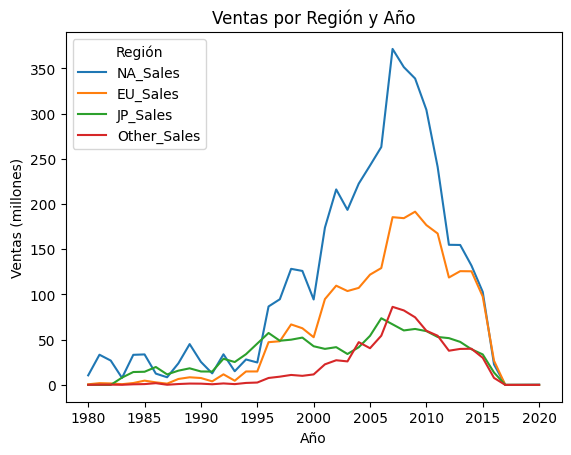

In [6]:
# Ventas por año y región

df_clean_yearly = df_clean.groupby('Year').agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum',
    'Global_Sales': 'sum'
}).reset_index()
df_clean_yearly

# Crear gráfico de líneas interactivo
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for col in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']:
    ax.plot(df_clean_yearly['Year'], df_clean_yearly[col], label=col)
ax.set_title('Ventas por Región y Año')
ax.set_xlabel('Año')
ax.set_ylabel('Ventas (millones)')
ax.legend(title='Región')
plt.show()

# Crear gráfico interactivo con Plotly
fig = px.line(df_clean_yearly, x='Year', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
              title='Ventas por Región y Año',
              labels={'value': 'Ventas (millones)', 'variable': 'Región'})
fig.show()  



---
## 3. Gráficos de Distribución

### 3.1 Sunburst Chart - Jerarquía de Géneros y Plataformas

In [7]:
# Preparar datos agregados para sunburst
df_clean_genre_platform = df_clean.groupby(['Genre', 'Platform']).agg({
    'Global_Sales': 'sum'
}).reset_index()

# Crear sunburst chart
fig = px.sunburst(df_clean_genre_platform, path=['Genre', 'Platform'], values='Global_Sales',
                  title='Ventas Globales por Género y Plataforma')
fig.show()


### 3.2 Treemap - Ventas por Publisher y Género

In [8]:
# Top publishers con sus géneros

df_clean_publisher_genre = df_clean.groupby(['Publisher', 'Genre']).agg({
    'Global_Sales': 'sum'
}).reset_index()

# Crear treemap
fig = px.treemap(df_clean_publisher_genre, path=['Publisher', 'Genre'], values='Global_Sales',
                 title='Ventas Globales por Editor y Género')
fig.show()



---
## 4. Análisis Comparativo

### 4.1 Box Plot Interactivo - Ventas por Género

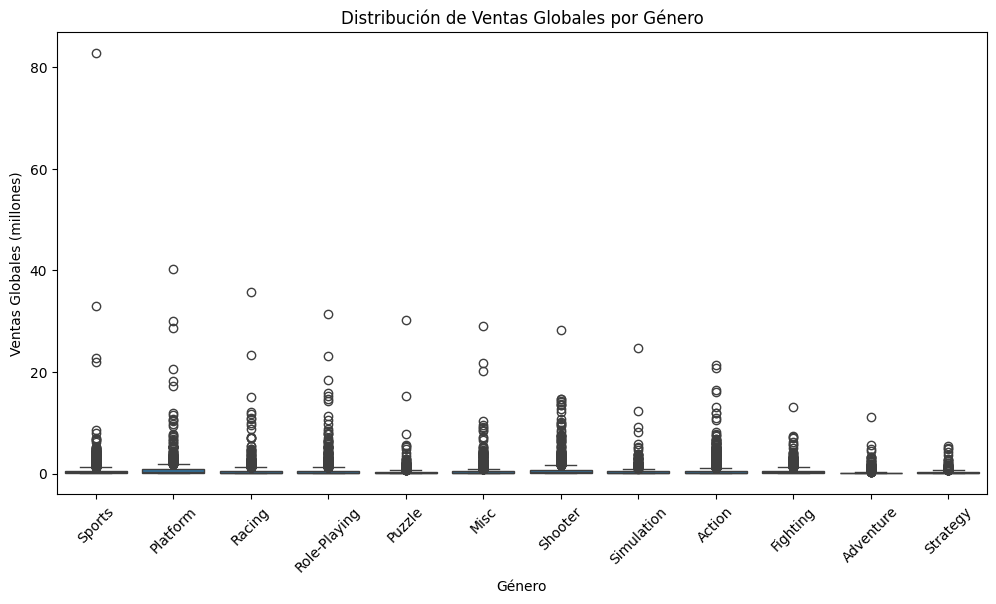

In [9]:
# Box plot de ventas por género
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df_clean)
plt.title('Distribución de Ventas Globales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

### 4.2 Violin Plot - Comparación de Regiones

In [ ]:
# Preparar datos en formato long para violin plot
df_clean_melted = df_clean.melt(id_vars=['Name', 'Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                           var_name='Region', value_name='Sales')
df_clean_melted

# Renombrar regiones
region_mapping = {
    'NA_Sales': 'Norteamérica',
    'EU_Sales': 'Europa',
    'JP_Sales': 'Japón',
    'Other_Sales': 'Otros'
}
df_clean_melted['Region'] = df_clean_melted['Region'].map(region_mapping)

# Crear violin plot
fig = px.violin(df_clean_melted, y='Sales', x='Region', color='Genre', box=True, points='all',
                 title='Distribución de Ventas por Región y Género',
                 labels={'Sales': 'Ventas (millones)', 'Region': 'Región'})
fig.show()


---
## 5. Análisis Multivariable

### 5.1 Scatter Plot 3D - Año, Ventas y Género

In [14]:
# Muestra de datos para mejor visualización 3D
df_clean_sample = df_clean.sample(200)
df_clean_sample

# Gráfico 3D
fig = px.scatter_3d(df_clean_sample, x='NA_Sales', y='EU_Sales', z='JP_Sales', color='Genre',
                    title='Ventas por Región en 3D',
                    labels={'NA_Sales': 'Ventas en NA (millones)', 'EU_Sales': 'Ventas en EU (millones)', 'JP_Sales': 'Ventas en JP (millones)'})
fig.show()


### 5.2 Bubble Chart - Plataformas por Año y Ventas

In [12]:
# Agrupar por plataforma y año
df_clean.groupby(['Platform', 'Year']).agg({
    'Global_Sales': 'sum'
}).reset_index()

# Top 10 plataformas para claridad
top_10_platforms = df_clean.groupby('Platform').agg({
    'Global_Sales': 'sum'
}).nlargest(10, 'Global_Sales').reset_index()

# Bubble chart
import plotly.express as px

fig = px.scatter(top_10_platforms, x='Platform', y='Global_Sales', size='Global_Sales',
                 title='Top 10 Platforms by Global Sales',
                 labels={'Global_Sales': 'Global Sales (in millions)', 'Platform': 'Gaming Platform'},
                 hover_name='Platform')

fig.show()


---
## 6. Heatmaps Interactivos

### 6.1 Heatmap - Ventas por Género y Década

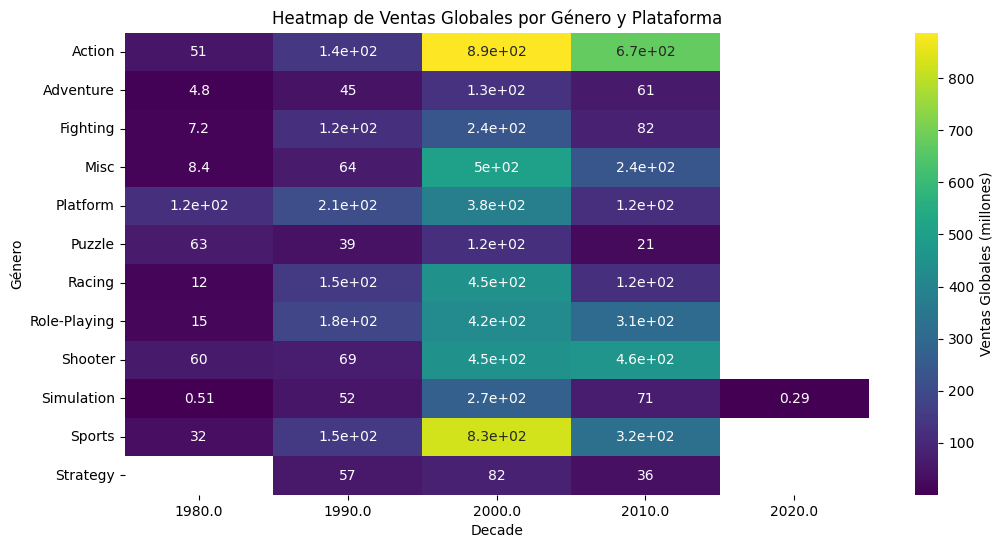

In [17]:
# Crear pivot table
pivot_table = df_clean.pivot_table(values='Global_Sales', index='Genre', columns='Decade', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='viridis',
            cbar_kws={'label': 'Ventas Globales (millones)'})
plt.title('Heatmap de Ventas Globales por Género y Plataforma')
plt.xlabel('Decade')
plt.ylabel('Género')
plt.show()

# Crear heatmap interactivo


### 6.2 Heatmap - Preferencias de Género por Región

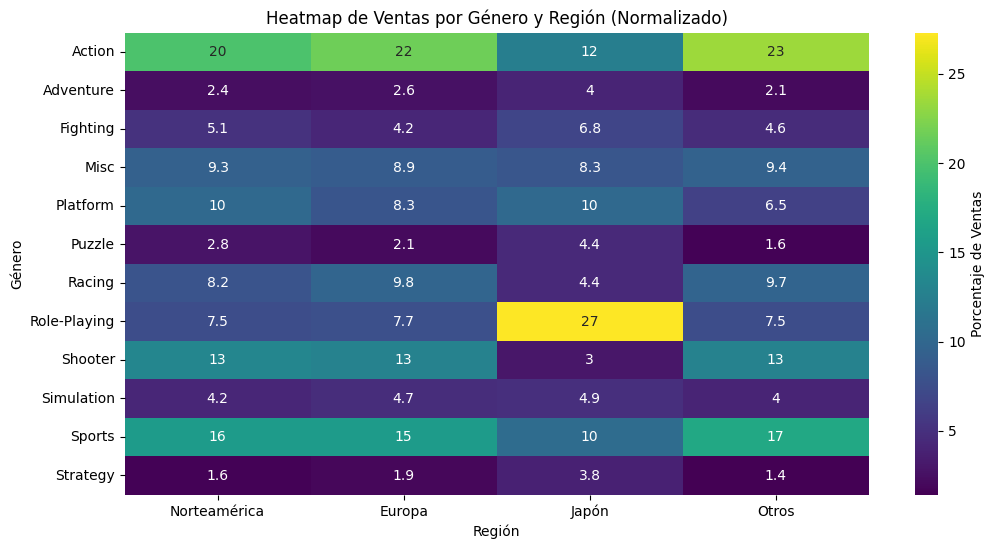

In [19]:
# Ventas por género en cada región
df_region_genre = df_clean.groupby(['Genre']).agg({
    'NA_Sales': 'sum',
    'EU_Sales': 'sum',
    'JP_Sales': 'sum',
    'Other_Sales': 'sum'
}).reset_index()
df_region_genre

# Normalizar por región (porcentaje)
df_region_genre_normalized = df_region_genre.copy()
region_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df_region_genre_normalized[region_cols] = df_region_genre_normalized[region_cols].div(df_region_genre_normalized[region_cols].sum(axis=0), axis=1) * 100
df_region_genre_normalized

# Renombrar columnas
df_region_genre_normalized = df_region_genre_normalized.rename(columns={
    'NA_Sales': 'Norteamérica',
    'EU_Sales': 'Europa',
    'JP_Sales': 'Japón',
    'Other_Sales': 'Otros'
}) 

# Crear heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_region_genre_normalized.set_index('Genre'), annot=True, cmap='viridis',
            cbar_kws={'label': 'Porcentaje de Ventas'})
plt.title('Heatmap de Ventas por Género y Región (Normalizado)')
plt.xlabel('Región')
plt.ylabel('Género')
plt.show()


---
## 7. Dashboard Consolidado

### 7.1 Panel de Métricas Clave

In [ ]:
# Calcular métricas clave

metrics = {
    'Total Juegos': df_clean['Name'].nunique(),
    'Total Plataformas': df_clean['Platform'].nunique(),
    'Total Publishers': df_clean['Publisher'].nunique(),
    'Ventas Globales Totales (millones)': df_clean['Global_Sales'].sum(),
    'Año de Lanzamiento Más Antiguo': df_clean['Year'].min(),
    'Año de Lanzamiento Más Reciente': df_clean['Year'].max()
}
metrics

In [ ]:
# 1. Ventas por región

ventas_region = df_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
ventas_region.columns = ['Region', 'Sales']
ventas_region

In [ ]:
# 2. Top géneros

top_genres = df_clean.groupby('Genre')['Global_Sales'].sum().reset_index()
top_genres = top_genres.sort_values(by='Global_Sales', ascending=False).head(10)
top_genres.head(5)

In [ ]:
# 3. Evolución temporal
evolucion_temporal = df_clean.groupby('Year')['Global_Sales'].sum().reset_index()
evolucion_temporal

In [ ]:
# 4. Top plataformas
top_platforms = df_clean.groupby('Platform')['Global_Sales'].sum().reset_index()
top_platforms = top_platforms.sort_values(by='Global_Sales', ascending=False).head(10)
top_platforms.head(5)


In [ ]:

# 5. Categorías de ventas
categorias_ventas = df_clean.groupby('Category')['Global_Sales'].sum().reset_index()
categorias_ventas = categorias_ventas.sort_values(by='Global_Sales', ascending=False).head(10)
categorias_ventas.head(5)


In [ ]:

# 6. Top publishers
top_publishers = df_clean.groupby('Publisher')['Global_Sales'].sum().reset_index()
top_publishers = top_publishers.sort_values(by='Global_Sales', ascending=False).head(10)
top_publishers.head(5)


In [ ]:

# Crear subplots para dashboard


# Layout general





,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72


---
## 8. Animaciones

### 8.1 Gráfico Animado - Evolución de Géneros por Año

In [ ]:
# Preparar datos para animación


# Solo años con buenos datos (1990-2016)


# Crear gráfico animado


---
## ✅ Resumen Final

### 🎨 Visualizaciones Creadas:

1. ✅ **Gráficos Básicos Interactivos**
   - Top juegos (barras horizontales)
   - Evolución temporal (líneas múltiples)

2. ✅ **Gráficos de Distribución**
   - Sunburst (jerarquía género-plataforma)
   - Treemap (publisher-género)

3. ✅ **Análisis Comparativo**
   - Box plots por género
   - Violin plots por región

4. ✅ **Análisis Multivariable**
   - Scatter 3D (ventas regionales)
   - Bubble chart (plataformas temporales)

5. ✅ **Heatmaps**
   - Género x Década
   - Género x Región

6. ✅ **Dashboard Consolidado**
   - 6 visualizaciones en un panel
   - Métricas clave

7. ✅ **Animaciones**
   - Evolución de géneros por año

---

### 🎯 Aplicación Web:

Estas visualizaciones serán la base para la aplicación Streamlit.

**Próximos pasos:**
1. Crear app de Streamlit con estas visualizaciones
2. Añadir filtros interactivos
3. Implementar múltiples páginas
4. Exportar visualizaciones

---

### 📚 Recursos Adicionales:

- [Plotly Documentation](https://plotly.com/python/)
- [Plotly Express](https://plotly.com/python/plotly-express/)
- [Streamlit Gallery](https://streamlit.io/gallery)

---
